Импортирование библиотек

In [1]:
# Базовые библиотеки
import numpy as np
import pandas as pd

# Воспроизводимость
RANDOM_STATE = 42

# Библиотеки sklearn для данных, моделей, разбиения и метрик
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    RocCurveDisplay,
    PrecisionRecallDisplay,
    brier_score_loss,
)

# Для калибровки
from sklearn.calibration import CalibratedClassifierCV

Загрузка учебного датасеета

In [3]:
df = pd.read_csv("S05-hw-dataset.csv")


EDA

In [4]:
df.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [6]:
df.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [7]:
df['default'].value_counts()

default
0    1769
1    1231
Name: count, dtype: int64

In [8]:
df['default'].value_counts(normalize=True)

default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

1) В датасете: 3000 объектов, 17 признаков
2) Пропусков в датасете нет
3) В checking_balance min = -3000Б что скорее всего аномалия
4) В years_employed min=0 (может быть студенты(?))
5) По value_counts мы видим, что default демонстрирует умеренный дисбаланс 59% на 40%, соотношение примерно 1.44:1, что считается приемлемым, не требует дополнительной балансировки данных

Подготовка признаков и таргета

In [12]:
y = df['default'].copy()
X = df.drop(['default', 'client_id'], axis=1).copy()

In [ ]:
print("Форма X:", X.shape)
print("Форма y:", y.shape)
print("Названия признаков:", list(X.columns)[:5], "...")  # первые 5

# Быстрый взгляд на данные
display(X.head())

# Распределение классов
y.value_counts(normalize=True).rename("fraction").to_frame()

Форма X: (3000, 15)
Форма y: (3000,)
Названия признаков: ['age', 'income', 'years_employed', 'credit_score', 'debt_to_income'] ...


,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years
0,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8
1,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7
2,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5
3,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7
4,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10


,fraction
default,
0,0.589667
1,0.410333


Проверка, что все признаки числовые

In [20]:
non_numeric_cols = X.select_dtypes(exclude=['int64', 'float64']).columns
if len(non_numeric_cols) == 0:
    print("Все признаки уже числовые")


Все признаки уже числовые


Проверяем debt_to_income (должен быть в диапазоне [0, 1])

In [ ]:
if 'debt_to_income' in X.columns:
    dti_min = X['debt_to_income'].min()
    dti_max = X['debt_to_income'].max()
    print(f"debt_to_income: [{dti_min:.4f}, {dti_max:.4f}]")
    if 0 <= dti_min and dti_max <= 1:
        print("Валидный диапазон [0, 1]")
    else:
        print("Внимание: выходит за рамки [0, 1]")
print()

debt_to_income: [0.0061, 0.8783]
Валидный диапазон [0, 1]



Проверяем другие важные признаки

In [19]:
check_columns = ['age', 'credit_score', 'has_mortgage', 'has_car_loan']
for col in check_columns:
    if col in X.columns:
        print(f"{col}: [{X[col].min()}, {X[col].max()}]")

age: [21, 69]
credit_score: [402, 850]
has_mortgage: [0, 1]
has_car_loan: [0, 1]


Разбиение на train / validation / test
Очень важно не обучать и не оценивать модель на одних и тех же данных.

Мы используем схему:

Сначала делим данные на:
X_temp, y_temp – 80% (train и validation),
X_test, y_test – 20% (честная финальная проверка).
Затем из X_temp, y_temp ещё выделяем:
X_train, y_train – 60% от исходных данных,
X_val, y_val – 20% от исходных данных.
Параметры:

test_size=... – доля данных в test/val;
stratify=y – сохраняем долю классов (особенно важно при дисбалансе);
random_state=RANDOM_STATE – фиксируем случайность.

In [21]:
# 1. Отделяем тестовую выборку (например, 20% данных)
X_temp, X_test, y_temp, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,          # важно для классификации: сохраняем долю классов
    random_state=RANDOM_STATE,
)

# 2. Делим оставшиеся данные на train и validation (например, 60/20)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp,
    y_temp,
    test_size=0.25,      # 0.25 от X_temp = 0.25 * 0.8 = 0.2 от исходных
    stratify=y_temp,
    random_state=RANDOM_STATE,
)

print("Размеры выборок:")
print("  train:", X_train.shape)
print("  val:  ", X_val.shape)
print("  test: ", X_test.shape)

print("\nРаспределение классов (train):")
print(y_train.value_counts(normalize=True))

print("\nРаспределение классов (val):")
print(y_val.value_counts(normalize=True))

print("\nРаспределение классов (test):")
print(y_test.value_counts(normalize=True))

Размеры выборок:
  train: (1800, 15)
  val:   (600, 15)
  test:  (600, 15)

Распределение классов (train):
default
0    0.589444
1    0.410556
Name: proportion, dtype: float64

Распределение классов (val):
default
0    0.59
1    0.41
Name: proportion, dtype: float64

Распределение классов (test):
default
0    0.59
1    0.41
Name: proportion, dtype: float64


Бейзлайн-модель: DummyClassifier
Прежде чем строить «умную» модель, полезно понять, как будет вести себя очень простая:

DummyClassifier(strategy="most_frequent") всегда предсказывает самый частый класс из train.
Такой подход почти не использует информацию из признаков, но даёт нижнюю планку качества:
любая нормальная модель должна быть лучше бейзлайна.

Здесь мы:

обучаем бейзлайн на X_train, y_train;
считаем метрики на X_val, y_val.
Набор метрик, на которые мы смотрим
Кратко напомним, что мы считаем:

accuracy – доля правильных ответов;
precision – из всех предсказанных «положительных» объектов сколько действительно положительные;
recall – из всех реально положительных сколько модель поймала;
f1 – компромисс между precision и recall;
ROC-AUC – площадь под ROC-кривой, показывает, насколько хорошо модель ранжирует объекты.
В задачах с возможным дисбалансом классов (как здесь) нельзя смотреть только на accuracy, важно учитывать хотя бы F1 и ROC-AUC.

In [22]:
# Бейзлайн-модель: ничего "умного", просто предсказываем самый частый класс (или случайно)
baseline = DummyClassifier(strategy="most_frequent", random_state=RANDOM_STATE)

# Обучаем только на train
baseline.fit(X_train, y_train)

# Оцениваем на validation
y_val_pred_baseline = baseline.predict(X_val)
y_val_proba_baseline = baseline.predict_proba(X_val)[:, 1]

print("=== Бейзлайн (DummyClassifier, most_frequent) – качество на validation ===")
print("Accuracy :", accuracy_score(y_val, y_val_pred_baseline))
print("Precision:", precision_score(y_val, y_val_pred_baseline, zero_division=0))
print("Recall   :", recall_score(y_val, y_val_pred_baseline, zero_division=0))
print("F1-score :", f1_score(y_val, y_val_pred_baseline, zero_division=0))

# Для ROC-AUC нам нужны вероятности положительного класса
try:
    print("ROC-AUC  :", roc_auc_score(y_val, y_val_proba_baseline))
except ValueError as e:
    print("Не удалось посчитать ROC-AUC для бейзлайна:", e)

=== Бейзлайн (DummyClassifier, most_frequent) – качество на validation ===
Accuracy : 0.59
Precision: 0.0
Recall   : 0.0
F1-score : 0.0
ROC-AUC  : 0.5


Почему важна точка отсчёта?

Минимальный порог: Любая "умная" модель должна превосходить бейзлайн. 
Оценка сложности задачи: Высокий accuracy бейзлайна (59%) показывает, что задача сложная — даже простейшая стратегия даёт приличную точность.
Выявление проблем: Если ваша модель хуже бейзлайна, это явный сигнал о проблемах с данными, признаками или обучением.
Интерпретация метрик: Бейзлайн помогает понять, какие метрики действительно важны. Например, точность 85% впечатляет, но если бейзлайн даёт 80%, улучшение незначительно.

Логистическая регрессия и подбор гиперпараметров

Логистическая регрессия в виде Pipeline
Теперь берём первую «нормальную» модель – логистическую регрессию.

Проблема: признаки могут быть в разных масштабах.
Поэтому мы соберём Pipeline, который делает два шага подряд:

StandardScaler() – масштабирует признаки (вычитает среднее, делит на std).
LogisticRegression(...) – обучает линейный классификатор на этих масштабированных признаках.
Важно:

Pipeline – это одна большая модель с методами fit, predict, predict_proba.
Мы обучаем и применяем один и тот же пайплайн – меньше шансов ошибиться.

In [26]:
# Собираем Pipeline:
# 1) Масштабирование признаков (StandardScaler)
# 2) Логистическая регрессия
log_reg_pipeline = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "logreg",
            LogisticRegression(
                penalty="l2",
                C=1.0,              # сила регуляризации (чем меньше C, тем сильнее регуляризация)
                solver="liblinear", # надёжный солвер для маленьких датасетов
                random_state=RANDOM_STATE,
                max_iter=1000,
            ),
        ),
    ]
)

# Обучаем pipeline на train
log_reg_pipeline.fit(X_train, y_train)

# Предсказываем на validation
y_val_pred = log_reg_pipeline.predict(X_val)
y_val_proba = log_reg_pipeline.predict_proba(X_val)[:, 1]

print("=== Логистическая регрессия (C=1.0) – качество на validation ===")
print("Accuracy :", accuracy_score(y_val, y_val_pred))
print("Precision:", precision_score(y_val, y_val_pred, zero_division=0))
print("Recall   :", recall_score(y_val, y_val_pred, zero_division=0))
print("F1-score :", f1_score(y_val, y_val_pred, zero_division=0))
print("ROC-AUC  :", roc_auc_score(y_val, y_val_proba))

print("\nПодробный отчёт по классам (classification_report):")
print(classification_report(y_val, y_val_pred,  target_names=['No Default (0)', 'Default (1)']))

=== Логистическая регрессия (C=1.0) – качество на validation ===
Accuracy : 0.8166666666666667
Precision: 0.8505154639175257
Recall   : 0.6707317073170732
F1-score : 0.75
ROC-AUC  : 0.8746382802811079

Подробный отчёт по классам (classification_report):
                precision    recall  f1-score   support

No Default (0)       0.80      0.92      0.86       354
   Default (1)       0.85      0.67      0.75       246

      accuracy                           0.82       600
     macro avg       0.83      0.79      0.80       600
  weighted avg       0.82      0.82      0.81       600



Подбор гиперпараметра C (регуляризация) через GridSearchCV
У логистической регрессии есть важный параметр C:

чем меньше C, тем сильнее регуляризация (модель проще, меньше переобучается);
чем больше C, тем модель свободнее (может переобучиться).
Вместо ручного перебора мы используем GridSearchCV:

задаём сетку значений C;
внутри GridSearchCV:
для каждого варианта C запускается кросс-валидация;
по выбранной метрике (scoring="roc_auc") выбирается лучший вариант.
Обратите внимание:

в названии параметра используется имя_шага__имя_параметра: logreg__C.

In [27]:
# Настроим сетку по параметру C (сила регуляризации)
param_grid = {
    "logreg__C": [0.01, 0.1, 1.0, 10.0, 100.0],
}

# GridSearchCV будет:
# - внутри делать кросс-валидацию по train
# - выбирать лучший C по заданной метрике (например, ROC-AUC).
grid_search = GridSearchCV(
    estimator=log_reg_pipeline,
    param_grid=param_grid,
    scoring="roc_auc",    # можно поменять на f1, recall и т.д.
    cv=5,
    n_jobs=-1,
    verbose=1,
)

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший ROC-AUC (по CV):", grid_search.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Лучшие параметры: {'logreg__C': 0.1}
Лучший ROC-AUC (по CV): 0.8535885101695057


Оценка лучшей модели: validation и test
После GridSearchCV у нас есть:

grid_search.best_estimator_ – пайплайн с лучшим C.
Дальше:

Смотрим метрики на validation (для обсуждения и сравнения с предыдущей моделью).
Смотрим метрики на test – это финальная, честная оценка.

In [29]:
# Берём лучшую найденную модель
best_model = grid_search.best_estimator_

# Оцениваем на validation
y_val_pred_best = best_model.predict(X_val)
y_val_proba_best = best_model.predict_proba(X_val)[:, 1]

print("=== Лучшая модель – качество на validation ===")
print("Accuracy :", accuracy_score(y_val, y_val_pred_best))
print("Precision:", precision_score(y_val, y_val_pred_best, zero_division=0))
print("Recall   :", recall_score(y_val, y_val_pred_best, zero_division=0))
print("F1-score :", f1_score(y_val, y_val_pred_best, zero_division=0))
print("ROC-AUC  :", roc_auc_score(y_val, y_val_proba_best))

# Оцениваем на test
y_test_pred = best_model.predict(X_test)
y_test_proba = best_model.predict_proba(X_test)[:, 1]

print("\n=== Лучшая модель – качество на test ===")
print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_test_pred, zero_division=0))
print("F1-score :", f1_score(y_test, y_test_pred, zero_division=0))
print("ROC-AUC  :", roc_auc_score(y_test, y_test_proba))

print("\nClassification report (test):")
print(classification_report(y_test, y_test_pred, target_names=['No Default (0)', 'Default (1)']))

=== Лучшая модель – качество на validation ===
Accuracy : 0.815
Precision: 0.8497409326424871
Recall   : 0.6666666666666666
F1-score : 0.7471526195899773
ROC-AUC  : 0.8746842129438244

=== Лучшая модель – качество на test ===
Accuracy : 0.805
Precision: 0.8056872037914692
Recall   : 0.6910569105691057
F1-score : 0.7439824945295405
ROC-AUC  : 0.8749598089201231

Classification report (test):
                precision    recall  f1-score   support

No Default (0)       0.80      0.88      0.84       354
   Default (1)       0.81      0.69      0.74       246

      accuracy                           0.81       600
     macro avg       0.81      0.79      0.79       600
  weighted avg       0.81      0.81      0.80       600



ROC-кривая
ROC-кривая показывает, как меняется качество модели при разных порогах отсечения:

по оси X – False Positive Rate (ложные срабатывания),
по оси Y – True Positive Rate (чувствительность / полнота).
Здесь используем готовый helper из sklearn.metrics: RocCurveDisplay.from_predictions.

Обратите внимание: для нашего учебного датасета кривая получается почти «квадратной», а AUC близок к 1.0.
В реальной жизни это редкость и часто повод проверить:

нет ли утечки данных (в фичах уже зашит таргет),
не слишком ли простая задача по сравнению с бизнес-реальностью.

In [33]:
import matplotlib.pyplot as plt

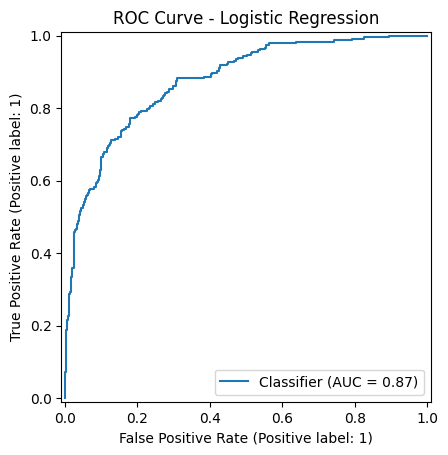

In [36]:
RocCurveDisplay.from_predictions(
    y_test,
    y_test_proba,
)
# Получаем текущую фигуру (аксесс к графику)
fig = plt.gcf()

# Добавляем заголовок 
plt.title(f'ROC Curve - Logistic Regression')

fig.savefig("figures/roc_curve_logreg.png", dpi=300, bbox_inches='tight')

PR-кривая (Precision-Recall)
PR-кривая особенно полезна при дисбалансе классов:

по оси X – recall (полнота),
по оси Y – precision (точность).
Снова используем helper из sklearn.

Здесь PR-кривая тоже почти идеальная. Это хороший повод подчеркнуть, что встроенные датасеты sklearn часто намного проще реальных данных, и в боевых задачах PR/ROC будут выглядеть гораздо скромнее.

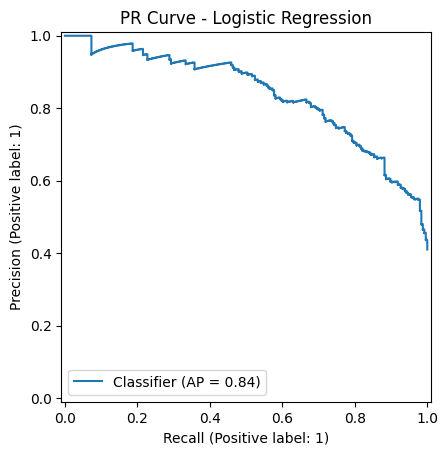

In [37]:
PrecisionRecallDisplay.from_predictions(
    y_test,
    y_test_proba,
)
# Получаем текущую фигуру (аксесс к графику)
fig = plt.gcf()

# Добавляем заголовок 
plt.title(f'PR Curve - Logistic Regression')

fig.savefig("figures/pr_curve_logreg.png", dpi=300, bbox_inches='tight')

Сравнение бейзлайна и логистической регрессии, текстовые выводы